# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [31]:
import sys
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
#tf.compat.v1.enable_eager_execution()

ValueError: tf.enable_eager_execution must be called at program startup.

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [7]:
print(numpy.size(train_X))

17


In [9]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

print(pred)
print(numpy.size(pred))
print(pred[0])

Tensor("Add_2:0", dtype=float32)
1
Tensor("strided_slice:0", dtype=float32)


In [29]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

tf.print(cost,output_stream="file://test.out")
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [27]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [47]:

tensor = tf.range(10)
tf.print("tensors:", tensor, {2: tensor * 2})
print(tensor[1])
print(tensor.shape)

Tensor("strided_slice_14:0", shape=(), dtype=int32)
(10,)


Epoch: 0050 cost= 0.168675810 W= 0.41892472 b= -0.4166897
Epoch: 0100 cost= 0.158080101 W= 0.4088538 b= -0.34424016
Epoch: 0150 cost= 0.148708031 W= 0.39938182 b= -0.2760991
Epoch: 0200 cost= 0.140418470 W= 0.39047322 b= -0.21201114
Epoch: 0250 cost= 0.133086383 W= 0.38209438 b= -0.15173477
Epoch: 0300 cost= 0.126601219 W= 0.3742139 b= -0.09504352
Epoch: 0350 cost= 0.120865166 W= 0.3668022 b= -0.04172383
Epoch: 0400 cost= 0.115791745 W= 0.3598313 b= 0.008424668
Epoch: 0450 cost= 0.111304417 W= 0.3532749 b= 0.05559064
Epoch: 0500 cost= 0.107335553 W= 0.34710854 b= 0.099951334
Epoch: 0550 cost= 0.103825256 W= 0.34130883 b= 0.14167377
Epoch: 0600 cost= 0.100720584 W= 0.33585405 b= 0.18091471
Epoch: 0650 cost= 0.097974673 W= 0.3307238 b= 0.21782185
Epoch: 0700 cost= 0.095546089 W= 0.3258986 b= 0.2525341
Epoch: 0750 cost= 0.093398258 W= 0.32136044 b= 0.28518108
Epoch: 0800 cost= 0.091498621 W= 0.31709197 b= 0.3158874
Epoch: 0850 cost= 0.089818627 W= 0.31307763 b= 0.34476665
Epoch: 0900 cost

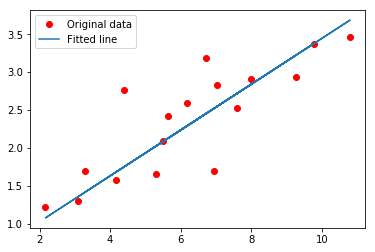

In [19]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [13]:
# Regression result